# Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_squared_error
from tensorflow.keras import layers,optimizers,Sequential
import tensorflow as tf

2025-05-12 22:21:11.326051: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-12 22:21:11.405219: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-12 22:21:11.407021: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-12 22:21:13.570183: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Preprocesamiento de datos

## Lectura del datast

In [2]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
df['Performance Index'] = df['Performance Index'].astype('int64')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     10000 non-null  int64 
 1   Previous Scores                   10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Sleep Hours                       10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   Performance Index                 10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


In [5]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

## División del dataset

In [6]:
y = df['Performance Index']
X = df.drop(columns='Performance Index')

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=321)
print('Dimensiones X_train', X_train.shape)
print('Dimensiones y_train', y_train.shape)
print('Dimensiones X_val', X_val.shape)
print('Dimensiones y_val', y_val.shape)
print('Dimensiones X_test', X_test.shape)
print('Dimensiones y_test', y_test.shape)

Dimensiones X_train (6000, 5)
Dimensiones y_train (6000,)
Dimensiones X_val (2000, 5)
Dimensiones y_val (2000,)
Dimensiones X_test (2000, 5)
Dimensiones y_test (2000,)


In [8]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [9]:
df_train = pd.concat(objs=[X_train,y_train],axis=1)
df_train

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,2,81,No,7,2,59
1,6,42,No,8,1,30
2,2,68,Yes,5,3,44
3,7,84,Yes,4,7,74
4,4,42,Yes,7,2,24
...,...,...,...,...,...,...
5995,1,68,No,7,8,46
5996,4,42,No,5,4,22
5997,6,56,No,4,9,46
5998,1,41,Yes,5,5,14


In [10]:
df_val = pd.concat(objs=[X_val,y_val],axis=1)
df_val

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,3,92,No,8,2,73
1,1,95,Yes,8,1,67
2,7,94,No,4,0,83
3,8,51,Yes,8,2,43
4,7,54,No,5,6,45
...,...,...,...,...,...,...
1995,4,84,No,6,2,68
1996,5,75,No,8,5,61
1997,7,62,No,7,2,52
1998,8,86,No,9,2,82


In [11]:
df_test = pd.concat(objs=[X_test,y_test],axis=1)
df_test

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,8,86,Yes,7,3,82
1,3,56,No,7,6,36
2,2,46,Yes,7,9,23
3,1,40,No,5,9,10
4,5,65,No,9,0,54
...,...,...,...,...,...,...
1995,2,88,Yes,6,6,65
1996,2,63,No,8,9,39
1997,3,62,No,8,1,41
1998,9,41,No,9,8,39


## Análisis exploratorio

In [12]:
df_train.describe().round()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,6000.0,6000.0,6000.0,6000.0,6000.0
mean,5.0,69.0,7.0,5.0,55.0
std,3.0,17.0,2.0,3.0,19.0
min,1.0,40.0,4.0,0.0,11.0
25%,3.0,54.0,5.0,2.0,40.0
50%,5.0,69.0,7.0,5.0,55.0
75%,7.0,85.0,8.0,7.0,71.0
max,9.0,99.0,9.0,9.0,100.0


In [13]:
col_numericas = df_train.describe().columns
col_numericas_X = list(col_numericas)
col_numericas_X.remove('Performance Index')

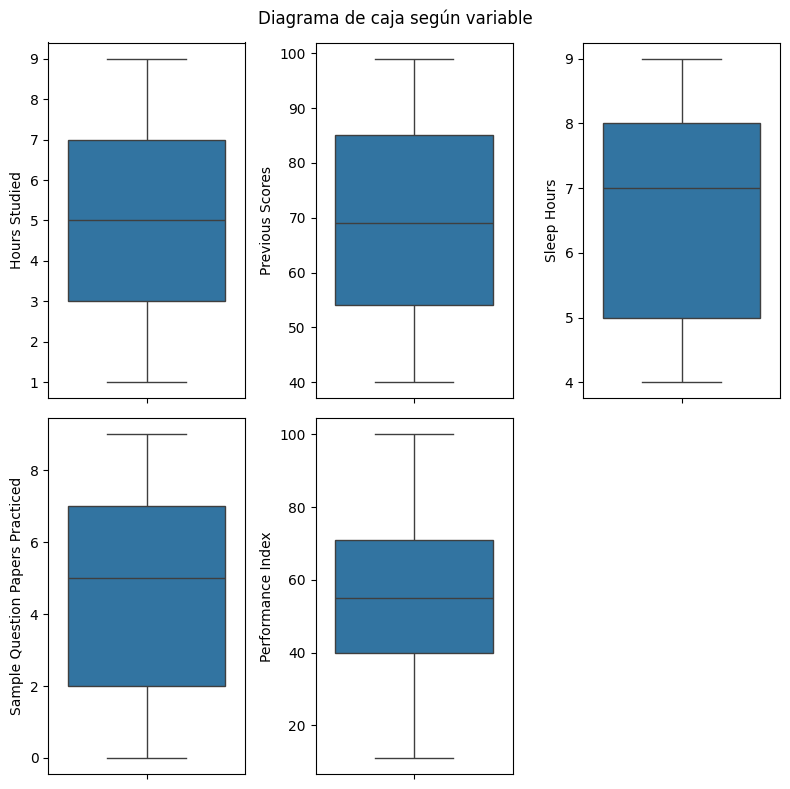

In [14]:
plt.figure(figsize=(8,8))
for i,variable in enumerate(col_numericas,1):
    plt.subplot(2, 3, i)  
    sns.boxplot(data=df_train,y=variable)
plt.suptitle('Diagrama de caja según variable')
plt.tight_layout()
plt.show()

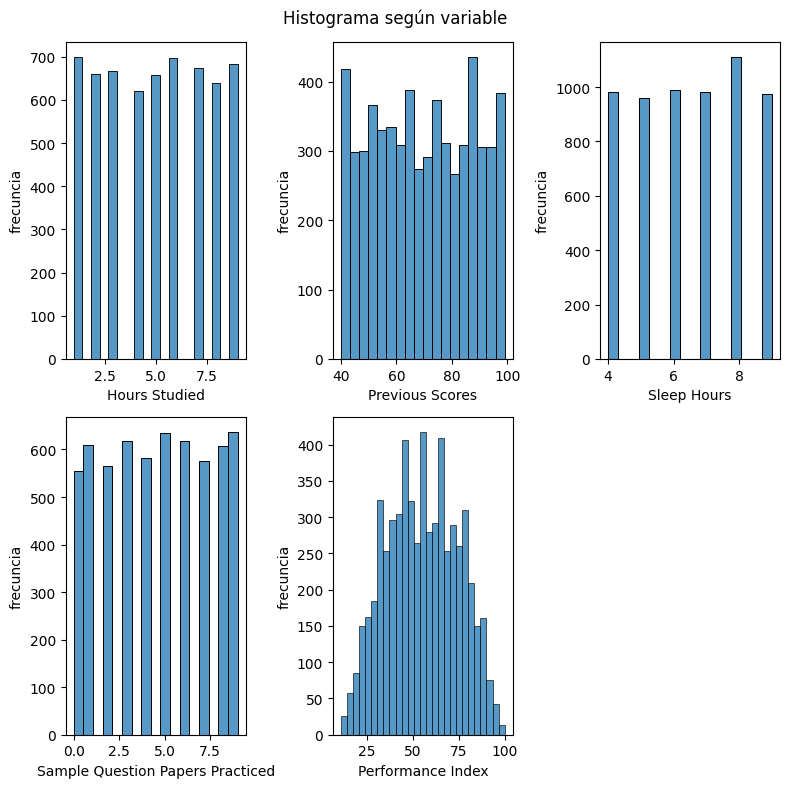

In [15]:
plt.figure(figsize=(8,8))
for i,variable in enumerate(col_numericas,1):
    plt.subplot(2, 3, i)  
    sns.histplot(data=df_train,x=variable)
    plt.ylabel('frecuncia')
plt.suptitle('Histograma según variable')    
plt.tight_layout()
plt.show()

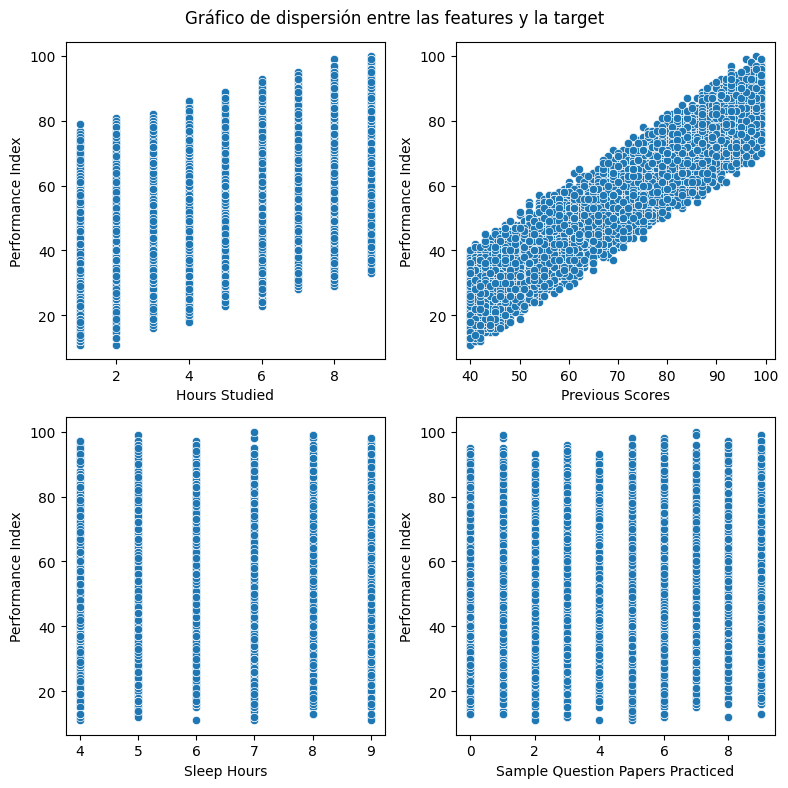

In [16]:
plt.figure(figsize=(8,8))
for i,variable in enumerate(col_numericas,1):
    if variable == 'Performance Index':continue
    plt.subplot(2, 2, i)  
    sns.scatterplot(data=df_train,x=variable,y='Performance Index')
plt.suptitle('Gráfico de dispersión entre las features y la target') 
plt.tight_layout()
plt.show()

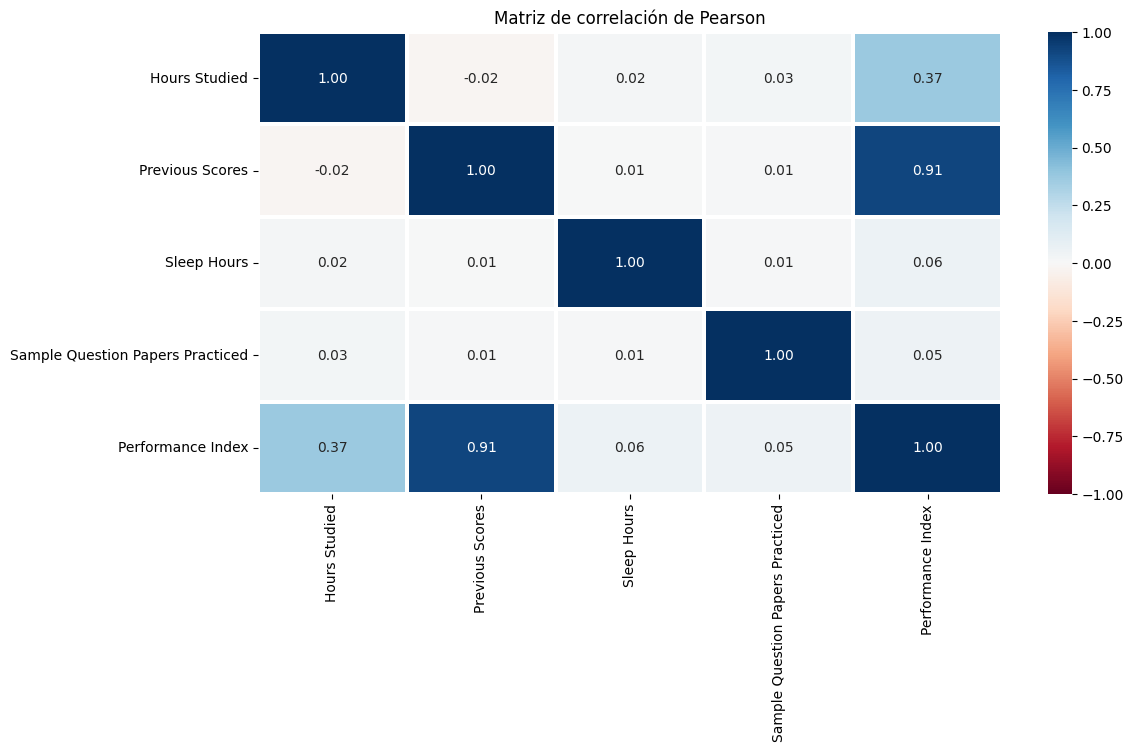

In [17]:
plt.figure(figsize=(12, 6))
sns.heatmap(data=df_train[col_numericas].corr(),vmin=-1, vmax=1, center=0,annot=True,fmt=".2f",linewidths=1.5,cmap='RdBu')
plt.title('Matriz de correlación de Pearson')
plt.show()

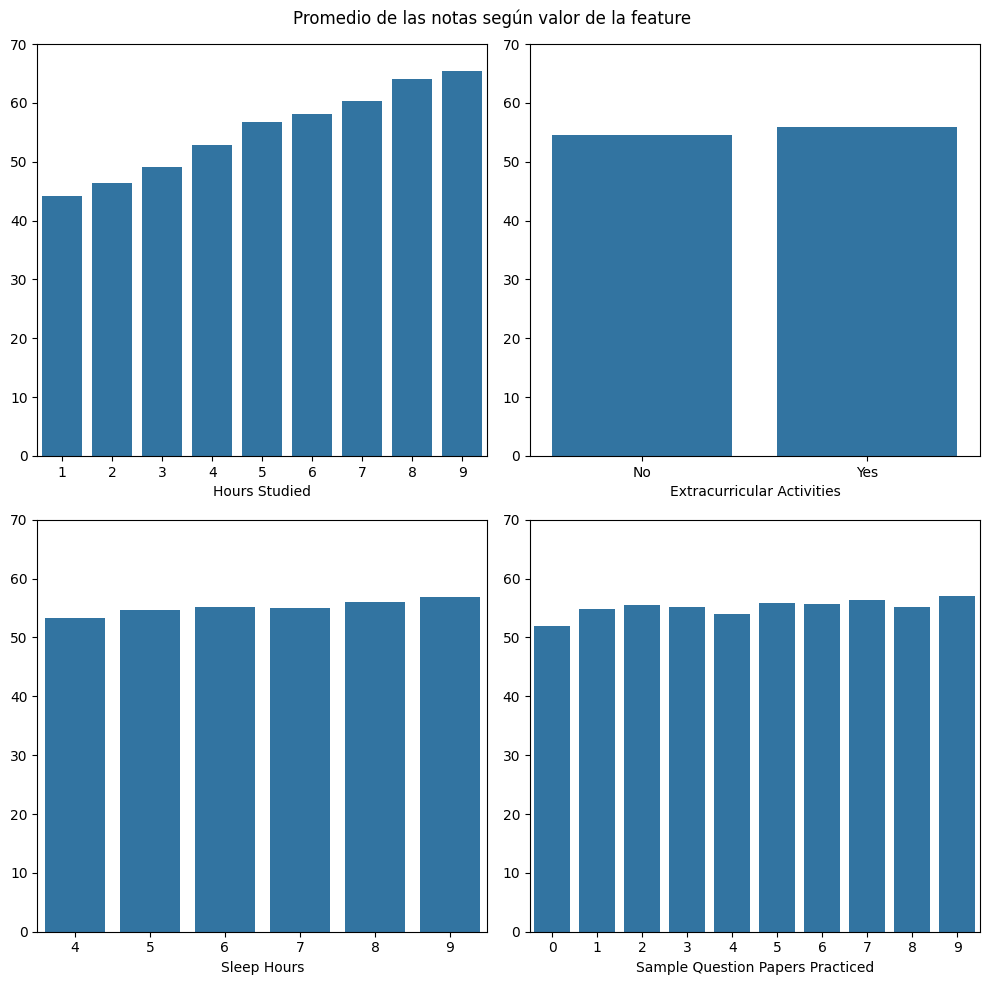

In [18]:
features = list(X_train.columns)
features.remove('Previous Scores')
n_features = len(features)
n_row = n_features//2 if n_features%2 == 0 else n_features//2+1
plt.figure(figsize=(10,10))
for n_subplot,feature in enumerate(features,1):
    plt.subplot(n_row,2,n_subplot)
    sns.barplot(data=df_train,x=feature,y='Performance Index',errorbar=None)
    plt.ylabel(None)
    plt.yticks(range(0,80,10))
plt.suptitle('Promedio de las notas según valor de la feature ')
plt.tight_layout()
plt.show()

## Codificación de la feature categórica

In [19]:
enc = OneHotEncoder(sparse_output=False)

train_feature_enc = enc.fit_transform(pd.DataFrame(X_train['Extracurricular Activities']))
train_feature_enc_df = pd.DataFrame(data=train_feature_enc,columns=enc.get_feature_names_out())
X_train_enc = pd.concat(objs=[X_train,train_feature_enc_df],axis=1).drop(columns='Extracurricular Activities')

val_feature_enc = enc.transform(pd.DataFrame(X_val['Extracurricular Activities']))
val_feature_enc_df = pd.DataFrame(data=val_feature_enc,columns=enc.get_feature_names_out())
X_val_enc = pd.concat(objs=[X_val,val_feature_enc_df],axis=1).drop(columns='Extracurricular Activities')

test_feature_enc = enc.transform(pd.DataFrame(X_test['Extracurricular Activities']))
test_feature_enc_df = pd.DataFrame(data=test_feature_enc,columns=enc.get_feature_names_out())
X_test_enc = pd.concat(objs=[X_test,test_feature_enc_df],axis=1).drop(columns='Extracurricular Activities')

## Escalado

In [20]:
scaler_min_max = MinMaxScaler()
X_train_esc = scaler_min_max.fit_transform(X_train_enc)
X_val_esc = scaler_min_max.transform(X_val_enc)
X_test_esc = scaler_min_max.transform(X_test_enc)
y_train = np.array(y_train,dtype='float32')
y_val = np.array(y_val,dtype='float32')
y_test = np.array(y_test,dtype='float32')

# Red Neuronal

In [31]:
n_features = X_train_enc.shape[1]
model = Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(2, activation="linear"),
    layers.Dense(units=1, activation='linear')
])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 14        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 17 (68.00 Byte)
Trainable params: 17 (68.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
import tensorflow.keras.backend as K

def r2_score(y_true, y_pred):
    ss_res = K.sum(K.square(y_true - y_pred))
    ss_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - ss_res / (ss_tot + K.epsilon())

In [34]:
optimizer = optimizers.Adam(learning_rate=0.05)
model.compile(optimizer=optimizer, loss='mse',metrics=[r2_score])
history = model.fit(x=X_train_esc,y=y_train, epochs=25, validation_data=(X_val_esc, y_val))

Epoch 1/25
188/188 [==============================] - 2s 6ms/step - loss: 577.4586 - r2_score: -0.6008 - val_loss: 64.9197 - val_r2_score: 0.8155
Epoch 2/25
188/188 [==============================] - 1s 5ms/step - loss: 22.1283 - r2_score: 0.9377 - val_loss: 4.9820 - val_r2_score: 0.9856
Epoch 3/25
188/188 [==============================] - 1s 4ms/step - loss: 4.3019 - r2_score: 0.9877 - val_loss: 4.2540 - val_r2_score: 0.9877
Epoch 4/25
188/188 [==============================] - 1s 4ms/step - loss: 4.1187 - r2_score: 0.9882 - val_loss: 4.1378 - val_r2_score: 0.9880
Epoch 5/25
188/188 [==============================] - 1s 5ms/step - loss: 4.1124 - r2_score: 0.9880 - val_loss: 4.1622 - val_r2_score: 0.9879
Epoch 6/25
188/188 [==============================] - 1s 6ms/step - loss: 4.1157 - r2_score: 0.9879 - val_loss: 4.1387 - val_r2_score: 0.9880
Epoch 7/25
188/188 [==============================] - 1s 5ms/step - loss: 4.1360 - r2_score: 0.9879 - val_loss: 4.1514 - val_r2_score: 0.9879
E

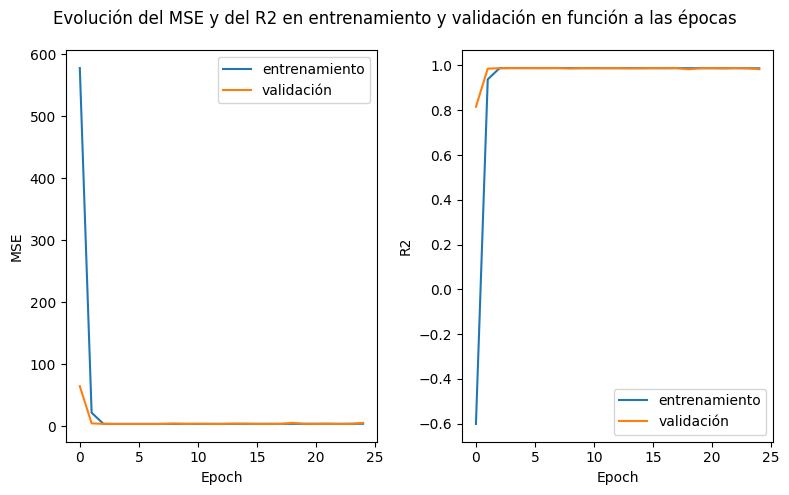

In [35]:
plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
#plt.title('Evolución del MSE en entrenamiento y validación en función a las épocas')
plt.plot(history.history['loss'], label='entrenamiento')
plt.plot(history.history['val_loss'], label = 'validación')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.subplot(1,2,2)
#plt.title('Evolución del coef determinación en entrenamiento y validación en función a las épocas')
plt.plot(history.history['r2_score'], label='entrenamiento')
plt.plot(history.history['val_r2_score'], label = 'validación')
plt.xlabel('Epoch')
plt.ylabel('R2')
plt.legend()
plt.suptitle('Evolución del MSE y del R2 en entrenamiento y validación en función a las épocas')
plt.tight_layout()
plt.show()

In [37]:
r2_train = history.history['r2_score'][-1]
r2_val = history.history['val_r2_score'][-1]
_, r2_test = model.evaluate(X_test_esc,y_test)

63/63 [==============================] - 0s 4ms/step - loss: 6.4096 - r2_score: 0.9813


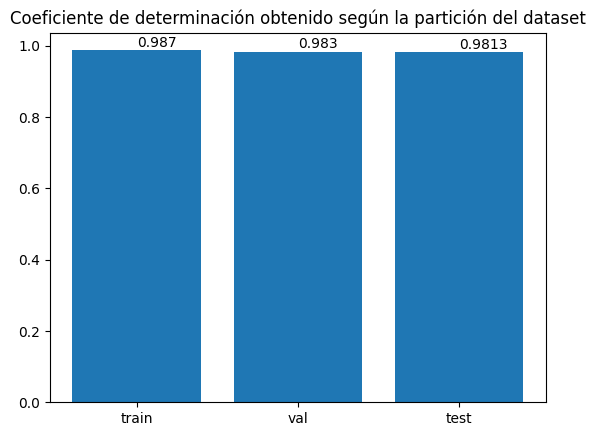

In [38]:
x_plot = ['train','val','test']
y_plot = [r2_train,r2_val,r2_test]
y_plot = [round(value,4) for value in y_plot]
plt.title('Coeficiente de determinación obtenido según la partición del dataset')
plt.bar(x_plot,y_plot)
for i in range(len(x_plot)):
    plt.text(i, y_plot[i]*1.01, y_plot[i])  # Placing text slightly above the bar
plt.show(block='False')